<a href="https://colab.research.google.com/github/debo004/Fashion_MNIST_Classification_CNN/blob/main/fashion_mnist_accuracy_test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras import datasets,models,layers

In [ ]:
(training_images, training_labels), (test_images, test_labels) = datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [ ]:
training_images = training_images.reshape(60000, 28, 28, 1)
test_images = test_images.reshape(10000, 28, 28, 1)

In [ ]:
training_images, test_images = training_images / 255.0, test_images / 255.0

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_7 (Conv2D)           (None, 26, 26, 64)        640       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 13, 13, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 11, 11, 64)        36928     
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 1600)              0         
                                                                 
 dense (Dense)               (None, 128)               2

In [ ]:
history = model.fit(training_images, training_labels, epochs=5,
                    validation_data=(test_images, test_labels))

Epoch 1/5
1875/1875 [==============================] - 51s 27ms/step - loss: 0.4444 - accuracy: 0.8378 - val_loss: 0.3442 - val_accuracy: 0.8741
Epoch 2/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2984 - accuracy: 0.8903 - val_loss: 0.3112 - val_accuracy: 0.8890
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2520 - accuracy: 0.9069 - val_loss: 0.2987 - val_accuracy: 0.8916
Epoch 4/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.2195 - accuracy: 0.9189 - val_loss: 0.2664 - val_accuracy: 0.9029
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1921 - accuracy: 0.9285 - val_loss: 0.2601 - val_accuracy: 0.9065


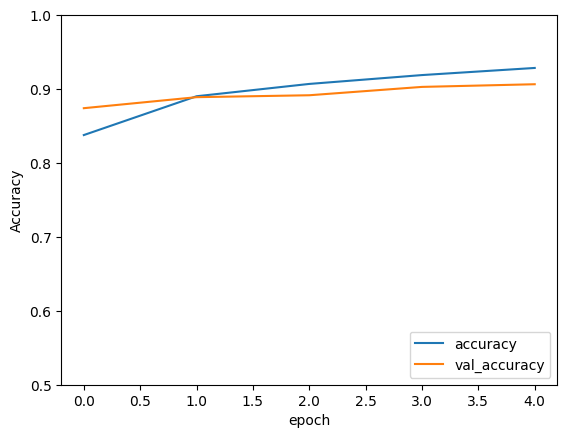

In [ ]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')